In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt

### Relu

In [5]:
X = tf.Variable(tf.random.normal((10,1)))

In [14]:
with tf.GradientTape() as gt:
    activations = tf.nn.relu(X)
gradients = gt.gradient(activations,X)

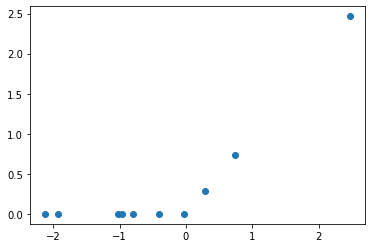

In [15]:
plt.scatter(X.numpy(),activations.numpy())

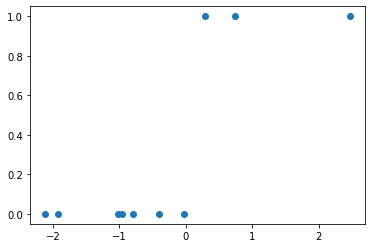

In [16]:
plt.scatter(X.numpy(),gradients)

### Sigmoid

<tf.Tensor: shape=(40,), dtype=float64, numpy=
array([-10.        ,  -9.48717949,  -8.97435897,  -8.46153846,
        -7.94871795,  -7.43589744,  -6.92307692,  -6.41025641,
        -5.8974359 ,  -5.38461538,  -4.87179487,  -4.35897436,
        -3.84615385,  -3.33333333,  -2.82051282,  -2.30769231,
        -1.79487179,  -1.28205128,  -0.76923077,  -0.25641026,
         0.25641026,   0.76923077,   1.28205128,   1.79487179,
         2.30769231,   2.82051282,   3.33333333,   3.84615385,
         4.35897436,   4.87179487,   5.38461538,   5.8974359 ,
         6.41025641,   6.92307692,   7.43589744,   7.94871795,
         8.46153846,   8.97435897,   9.48717949,  10.        ])>

In [23]:
X = tf.Variable(tf.linspace(-10,10,40))
with tf.GradientTape() as gt:
    activations = tf.nn.sigmoid(X)
gradients = gt.gradient(activations,X)

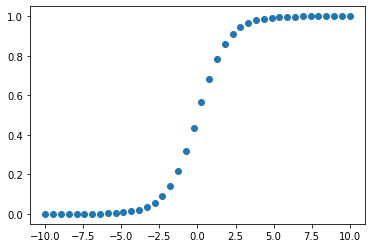

In [24]:
plt.scatter(X.numpy(),activations.numpy())

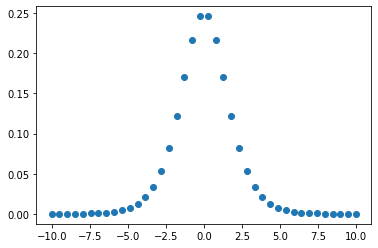

In [25]:
plt.scatter(X.numpy(),gradients)

### MLP from Scratch

In [36]:
from tensorflow.keras import datasets

In [37]:
fashion_mnist = datasets.fashion_mnist

In [42]:
(train_x,train_y),(test_x,test_y) = fashion_mnist.load_data()

### Flatten and normalize train and test

In [43]:
train_x, test_x = [tf.reshape(i,(-1,28*28))/255 for i in [train_x, test_x]]

In [60]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_x,train_y)).batch(32)

### Create Model From Scratch

In [87]:
hidden_layer_units = 20

In [88]:
w1 = tf.Variable(tf.random.normal((train_x.shape[-1],hidden_layer_units)))
b1 = tf.Variable(tf.random.normal((1,)))
w2 = tf.Variable(tf.random.normal((hidden_layer_units,10)))
b2 = tf.Variable(tf.random.normal((1,)))

In [89]:
def relu(x):
    zeros = tf.zeros_like(x)
    return tf.math.maximum(x,zeros)

In [90]:
def forward_pass(x):
    y1 = tf.tensordot(x,w1,1)+b1
    y1_act = relu(y1)
    y2 = tf.tensordot(y1_act,w2,1)+b2
    return y2

In [91]:
loss = tf.nn.sparse_softmax_cross_entropy_with_logits

In [92]:
optimizer = tf.keras.optimizers.Adam(0.01)

In [93]:
for i in range(10):
    for samples, y_labels in train_dataset:
        y_labels = tf.cast(y_labels,tf.int32)
        with tf.GradientTape() as gt:
            op = forward_pass(samples)
            y_loss = loss(y_labels,op)
            z_loss = tf.reduce_sum(y_loss)
        grads = gt.gradient(z_loss,[w1,b1,w2,b2])
        optimizer.apply_gradients(zip(grads,[w1,b1,w2,b2]))
    print(z_loss)

tf.Tensor(28.801332, shape=(), dtype=float32)
tf.Tensor(19.41587, shape=(), dtype=float32)
tf.Tensor(17.861305, shape=(), dtype=float32)
tf.Tensor(15.241432, shape=(), dtype=float32)
tf.Tensor(15.054805, shape=(), dtype=float32)
tf.Tensor(13.348408, shape=(), dtype=float32)
tf.Tensor(12.871298, shape=(), dtype=float32)
tf.Tensor(13.447802, shape=(), dtype=float32)
tf.Tensor(13.293612, shape=(), dtype=float32)
tf.Tensor(13.184313, shape=(), dtype=float32)
